In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
from tensorflow import keras

In [4]:
from keras.models import load_model

#데이터 로드
df = pd.read_csv('pildong_data.csv',index_col=0, parse_dates=True)

# 모델 로드
model = load_model('population_predict.h5')
#parameter: n_input = 168, n_features = 1

In [89]:
#modeling 단계와 동일하게 scaling
n_steps = 168 #일주일치 데이터
n_features = 1 #변수 개수
n_month = 744 # 한달치 데이터

In [73]:
from sklearn.preprocessing import MinMaxScaler

#전체 data에 해 스케일링

scaler = MinMaxScaler()
scaler.fit(df)
scaled_dataset = scaler.transform(df)

In [103]:
from tqdm import tqdm

# holding my predictions
predictions = []  # 예측 결과를 저장하기 위한 빈 배열

# 마지막 한달치 데이터부터 시작해서 한달치 예측
first_eval_batch = scaled_dataset[-n_steps:]

# RNN에 맞춰 timeseriesgenerator 출력 형식으로 형 변환 (batch 사이즈: 168) -> (n, 168)
current_batch = first_eval_batch.reshape(1, n_steps)  # (1, 168)

# tqdm 설정
tqdm_iterator = tqdm(range(n_month), desc='Predicting', leave=False)

# 예측할 범위 지정 (n_month 데이터 길이만큼 예측) -> 168의 크기를 가진 batch가 720개 필요
for i in tqdm(range(n_month)):
    current_pred = model.predict(current_batch)  # 한 배치를 통해 예측된 결과값 1개

    # 예측값을 저장
    predictions.append(current_pred)  # 예측한 결과를 하나씩 추가

    # batch의 시작 포인트를 하나씩 뒤로 밀고, 새로운 예측값을 마지막에 저장하여 batch 업데이트
    current_batch = np.append(current_batch[:, 1:], current_pred, axis=1)

 # tqdm 표시줄을 삭제하지 않음
tqdm_iterator.close()


Predicting:   0%|          | 0/744 [00:00<?, ?it/s]

                                                   

1/1 [==============================] - 0s 49ms/step




  0%|          | 1/744 [00:00<01:22,  9.04it/s]

1/1 [==============================] - 0s 46ms/step




  0%|          | 2/744 [00:00<01:20,  9.19it/s]

1/1 [==============================] - 0s 42ms/step




  0%|          | 3/744 [00:00<01:17,  9.51it/s]

1/1 [==============================] - 0s 46ms/step




  1%|          | 4/744 [00:00<01:19,  9.27it/s]

1/1 [==============================] - 0s 41ms/step




  1%|          | 5/744 [00:00<01:18,  9.44it/s]

1/1 [==============================] - 0s 46ms/step




  1%|          | 7/744 [00:00<01:14,  9.89it/s]

1/1 [==============================] - 0s 45ms/step




  1%|          | 8/744 [00:00<01:14,  9.89it/s]

1/1 [==============================] - 0s 42ms/step




  1%|          | 9/744 [00:00<01:17,  9.48it/s]

1/1 [==============================] - 0s 65ms/step




  1%|▏         | 10/744 [00:01<01:21,  8.99it/s]

1/1 [==============================] - 0s 44ms/step




  1%|▏         | 11/744 [00:01<01:19,  9.22it/s]

1/1 [==============================] - 0s 43ms/step




  2%|▏         | 12/744 [00:01<01:18,  9.34it/s]

1/1 [==============================] - 0s 45ms/step




  2%|▏         | 13/744 [00:01<01:19,  9.22it/s]

1/1 [==============================] - 0s 43ms/step




  2%|▏         | 14/744 [00:01<01:19,  9.13it/s]

1/1 [==============================] - 0s 43ms/step




  2%|▏         | 15/744 [00:01<01:17,  9.35it/s]

1/1 [==============================] - 0s 43ms/step




  2%|▏         | 16/744 [00:01<01:16,  9.52it/s]

1/1 [==============================] - 0s 46ms/step




  2%|▏         | 17/744 [00:01<01:16,  9.46it/s]

1/1 [==============================] - 0s 54ms/step




  3%|▎         | 19/744 [00:02<01:16,  9.53it/s]

1/1 [==============================] - 0s 51ms/step




  3%|▎         | 20/744 [00:02<01:16,  9.46it/s]

1/1 [==============================] - 0s 45ms/step




  3%|▎         | 21/744 [00:02<01:16,  9.50it/s]

1/1 [==============================] - 0s 56ms/step




  3%|▎         | 22/744 [00:02<01:18,  9.18it/s]

1/1 [==============================] - 0s 43ms/step




  3%|▎         | 23/744 [00:02<01:18,  9.21it/s]

1/1 [==============================] - 0s 43ms/step




  3%|▎         | 25/744 [00:02<01:14,  9.71it/s]

1/1 [==============================] - 0s 47ms/step




  3%|▎         | 26/744 [00:02<01:15,  9.56it/s]

1/1 [==============================] - 0s 46ms/step




  4%|▎         | 27/744 [00:02<01:14,  9.60it/s]

1/1 [==============================] - 0s 53ms/step




  4%|▍         | 29/744 [00:03<01:14,  9.63it/s]

1/1 [==============================] - 0s 48ms/step




  4%|▍         | 31/744 [00:03<01:14,  9.57it/s]

1/1 [==============================] - 0s 44ms/step




  4%|▍         | 32/744 [00:03<01:14,  9.57it/s]

1/1 [==============================] - 0s 45ms/step




  5%|▍         | 34/744 [00:03<01:11,  9.94it/s]

1/1 [==============================] - 0s 46ms/step




  5%|▍         | 35/744 [00:03<01:11,  9.86it/s]

1/1 [==============================] - 0s 53ms/step




  5%|▍         | 36/744 [00:03<01:13,  9.63it/s]

1/1 [==============================] - 0s 50ms/step




  5%|▍         | 37/744 [00:03<01:15,  9.35it/s]

1/1 [==============================] - 0s 55ms/step




  5%|▌         | 38/744 [00:04<01:18,  9.01it/s]

1/1 [==============================] - 0s 72ms/step




  5%|▌         | 39/744 [00:04<01:30,  7.82it/s]

1/1 [==============================] - 0s 69ms/step




  5%|▌         | 40/744 [00:04<01:43,  6.81it/s]

1/1 [==============================] - 0s 78ms/step




  6%|▌         | 41/744 [00:04<01:49,  6.44it/s]

1/1 [==============================] - 0s 67ms/step




  6%|▌         | 42/744 [00:04<01:47,  6.53it/s]

1/1 [==============================] - 0s 75ms/step




  6%|▌         | 43/744 [00:04<01:51,  6.31it/s]

1/1 [==============================] - 0s 70ms/step




  6%|▌         | 44/744 [00:05<01:50,  6.31it/s]

1/1 [==============================] - 0s 78ms/step




  6%|▌         | 45/744 [00:05<01:51,  6.26it/s]

1/1 [==============================] - 0s 73ms/step




  6%|▌         | 46/744 [00:05<01:48,  6.44it/s]

1/1 [==============================] - 0s 69ms/step




  6%|▋         | 47/744 [00:05<01:46,  6.55it/s]

1/1 [==============================] - 0s 69ms/step




  6%|▋         | 48/744 [00:05<01:44,  6.64it/s]

1/1 [==============================] - 0s 80ms/step




  7%|▋         | 49/744 [00:05<01:45,  6.60it/s]

1/1 [==============================] - 0s 76ms/step




  7%|▋         | 50/744 [00:05<01:45,  6.61it/s]

1/1 [==============================] - 0s 69ms/step




  7%|▋         | 51/744 [00:06<01:44,  6.63it/s]

1/1 [==============================] - 0s 65ms/step




  7%|▋         | 52/744 [00:06<01:47,  6.41it/s]

1/1 [==============================] - 0s 72ms/step




  7%|▋         | 53/744 [00:06<01:45,  6.56it/s]

1/1 [==============================] - 0s 65ms/step




  7%|▋         | 54/744 [00:06<01:43,  6.64it/s]

1/1 [==============================] - 0s 68ms/step




  7%|▋         | 55/744 [00:06<01:42,  6.74it/s]

1/1 [==============================] - 0s 65ms/step




  8%|▊         | 56/744 [00:06<01:41,  6.79it/s]

1/1 [==============================] - 0s 74ms/step




  8%|▊         | 57/744 [00:07<01:44,  6.57it/s]

1/1 [==============================] - 0s 66ms/step




  8%|▊         | 58/744 [00:07<01:42,  6.72it/s]

1/1 [==============================] - 0s 68ms/step




  8%|▊         | 59/744 [00:07<01:43,  6.63it/s]

1/1 [==============================] - 0s 66ms/step




  8%|▊         | 60/744 [00:07<01:45,  6.46it/s]

1/1 [==============================] - 0s 68ms/step




  8%|▊         | 61/744 [00:07<01:43,  6.61it/s]

1/1 [==============================] - 0s 71ms/step




  8%|▊         | 62/744 [00:07<01:40,  6.76it/s]

1/1 [==============================] - 0s 65ms/step




  8%|▊         | 63/744 [00:07<01:40,  6.75it/s]

1/1 [==============================] - 0s 83ms/step




  9%|▊         | 64/744 [00:08<01:43,  6.54it/s]

1/1 [==============================] - 0s 71ms/step




  9%|▊         | 65/744 [00:08<01:44,  6.51it/s]

1/1 [==============================] - 0s 78ms/step




  9%|▉         | 66/744 [00:08<01:52,  6.02it/s]

1/1 [==============================] - 0s 58ms/step




  9%|▉         | 67/744 [00:08<01:45,  6.40it/s]

1/1 [==============================] - 0s 41ms/step




  9%|▉         | 69/744 [00:08<01:25,  7.88it/s]

1/1 [==============================] - 0s 48ms/step




 10%|▉         | 71/744 [00:08<01:17,  8.64it/s]

1/1 [==============================] - 0s 42ms/step




 10%|▉         | 72/744 [00:09<01:15,  8.89it/s]

1/1 [==============================] - 0s 44ms/step




 10%|▉         | 73/744 [00:09<01:13,  9.10it/s]

1/1 [==============================] - 0s 44ms/step




 10%|▉         | 74/744 [00:09<01:17,  8.68it/s]

1/1 [==============================] - 0s 46ms/step




 10%|█         | 75/744 [00:09<01:18,  8.55it/s]

1/1 [==============================] - 0s 42ms/step




 10%|█         | 76/744 [00:09<01:15,  8.83it/s]

1/1 [==============================] - 0s 52ms/step




 10%|█         | 77/744 [00:09<01:15,  8.88it/s]

1/1 [==============================] - 0s 53ms/step




 10%|█         | 78/744 [00:09<01:14,  8.97it/s]

1/1 [==============================] - 0s 44ms/step




 11%|█         | 79/744 [00:09<01:12,  9.17it/s]

1/1 [==============================] - 0s 43ms/step




 11%|█         | 81/744 [00:10<01:07,  9.77it/s]

1/1 [==============================] - 0s 45ms/step




 11%|█         | 82/744 [00:10<01:08,  9.68it/s]

1/1 [==============================] - 0s 43ms/step




 11%|█         | 83/744 [00:10<01:08,  9.72it/s]

1/1 [==============================] - 0s 48ms/step




 11%|█▏        | 84/744 [00:10<01:10,  9.35it/s]

1/1 [==============================] - 0s 51ms/step




 11%|█▏        | 85/744 [00:10<01:11,  9.19it/s]

1/1 [==============================] - 0s 47ms/step




 12%|█▏        | 86/744 [00:10<01:12,  9.09it/s]

1/1 [==============================] - 0s 41ms/step




 12%|█▏        | 87/744 [00:10<01:10,  9.33it/s]

1/1 [==============================] - 0s 42ms/step




 12%|█▏        | 88/744 [00:10<01:09,  9.46it/s]

1/1 [==============================] - 0s 46ms/step




 12%|█▏        | 89/744 [00:10<01:15,  8.65it/s]

1/1 [==============================] - 0s 44ms/step




 12%|█▏        | 90/744 [00:11<01:14,  8.84it/s]

1/1 [==============================] - 0s 50ms/step




 12%|█▏        | 91/744 [00:11<01:12,  8.98it/s]

1/1 [==============================] - 0s 48ms/step




 12%|█▏        | 92/744 [00:11<01:12,  9.01it/s]

1/1 [==============================] - 0s 42ms/step




 12%|█▎        | 93/744 [00:11<01:10,  9.24it/s]

1/1 [==============================] - 0s 52ms/step




 13%|█▎        | 94/744 [00:11<01:12,  8.95it/s]

1/1 [==============================] - 0s 42ms/step




 13%|█▎        | 95/744 [00:11<01:10,  9.19it/s]

1/1 [==============================] - 0s 44ms/step




 13%|█▎        | 97/744 [00:11<01:05,  9.83it/s]

1/1 [==============================] - 0s 44ms/step




 13%|█▎        | 98/744 [00:11<01:07,  9.56it/s]

1/1 [==============================] - 0s 54ms/step




 13%|█▎        | 99/744 [00:11<01:09,  9.34it/s]

1/1 [==============================] - 0s 43ms/step




 13%|█▎        | 100/744 [00:12<01:08,  9.41it/s]

1/1 [==============================] - 0s 43ms/step




 14%|█▎        | 101/744 [00:12<01:09,  9.20it/s]

1/1 [==============================] - 0s 46ms/step




 14%|█▎        | 102/744 [00:12<01:09,  9.23it/s]

1/1 [==============================] - 0s 42ms/step




 14%|█▍        | 103/744 [00:12<01:08,  9.37it/s]

1/1 [==============================] - 0s 41ms/step




 14%|█▍        | 104/744 [00:12<01:07,  9.45it/s]

1/1 [==============================] - 0s 41ms/step




 14%|█▍        | 105/744 [00:12<01:06,  9.60it/s]

1/1 [==============================] - 0s 46ms/step




 14%|█▍        | 106/744 [00:12<01:08,  9.38it/s]

1/1 [==============================] - 0s 48ms/step




 14%|█▍        | 107/744 [00:12<01:07,  9.42it/s]

1/1 [==============================] - 0s 43ms/step




 15%|█▍        | 108/744 [00:12<01:07,  9.37it/s]

1/1 [==============================] - 0s 45ms/step




 15%|█▍        | 109/744 [00:13<01:08,  9.30it/s]

1/1 [==============================] - 0s 63ms/step




 15%|█▍        | 110/744 [00:13<01:14,  8.47it/s]

1/1 [==============================] - 0s 43ms/step




 15%|█▍        | 111/744 [00:13<01:13,  8.64it/s]

1/1 [==============================] - 0s 42ms/step




 15%|█▌        | 112/744 [00:13<01:10,  8.94it/s]

1/1 [==============================] - 0s 42ms/step




 15%|█▌        | 113/744 [00:13<01:11,  8.88it/s]

1/1 [==============================] - 0s 44ms/step




 15%|█▌        | 114/744 [00:13<01:09,  9.09it/s]

1/1 [==============================] - 0s 40ms/step




 15%|█▌        | 115/744 [00:13<01:10,  8.92it/s]

1/1 [==============================] - 0s 46ms/step




 16%|█▌        | 116/744 [00:13<01:09,  9.08it/s]

1/1 [==============================] - 0s 52ms/step




 16%|█▌        | 117/744 [00:13<01:09,  9.00it/s]

1/1 [==============================] - 0s 44ms/step




 16%|█▌        | 118/744 [00:14<01:08,  9.17it/s]

1/1 [==============================] - 0s 43ms/step




 16%|█▌        | 119/744 [00:14<01:09,  9.01it/s]

1/1 [==============================] - 0s 48ms/step




 16%|█▌        | 120/744 [00:14<01:09,  9.03it/s]

1/1 [==============================] - 0s 44ms/step




 16%|█▋        | 121/744 [00:14<01:08,  9.06it/s]

1/1 [==============================] - 0s 52ms/step




 16%|█▋        | 122/744 [00:14<01:11,  8.68it/s]

1/1 [==============================] - 0s 45ms/step




 17%|█▋        | 123/744 [00:14<01:09,  8.90it/s]

1/1 [==============================] - 0s 46ms/step




 17%|█▋        | 124/744 [00:14<01:08,  9.10it/s]

1/1 [==============================] - 0s 52ms/step




 17%|█▋        | 125/744 [00:14<01:09,  8.94it/s]

1/1 [==============================] - 0s 49ms/step




 17%|█▋        | 126/744 [00:14<01:08,  9.05it/s]

1/1 [==============================] - 0s 42ms/step




 17%|█▋        | 127/744 [00:15<01:08,  8.96it/s]

1/1 [==============================] - 0s 53ms/step




 17%|█▋        | 128/744 [00:15<01:09,  8.84it/s]

1/1 [==============================] - 0s 49ms/step




 17%|█▋        | 129/744 [00:15<01:09,  8.80it/s]

1/1 [==============================] - 0s 43ms/step




 17%|█▋        | 130/744 [00:15<01:08,  9.02it/s]

1/1 [==============================] - 0s 54ms/step




 18%|█▊        | 131/744 [00:15<01:09,  8.86it/s]

1/1 [==============================] - 0s 42ms/step




 18%|█▊        | 132/744 [00:15<01:07,  9.02it/s]

1/1 [==============================] - 0s 47ms/step




 18%|█▊        | 133/744 [00:15<01:08,  8.93it/s]

1/1 [==============================] - 0s 53ms/step




 18%|█▊        | 134/744 [00:15<01:13,  8.26it/s]

1/1 [==============================] - 0s 44ms/step




 18%|█▊        | 135/744 [00:15<01:11,  8.52it/s]

1/1 [==============================] - 0s 43ms/step




 18%|█▊        | 136/744 [00:16<01:09,  8.80it/s]

1/1 [==============================] - 0s 47ms/step




 18%|█▊        | 137/744 [00:16<01:09,  8.75it/s]

1/1 [==============================] - 0s 45ms/step




 19%|█▊        | 138/744 [00:16<01:08,  8.87it/s]

1/1 [==============================] - 0s 45ms/step




 19%|█▊        | 139/744 [00:16<01:07,  8.98it/s]

1/1 [==============================] - 0s 54ms/step




 19%|█▉        | 140/744 [00:16<01:08,  8.87it/s]

1/1 [==============================] - 0s 54ms/step




 19%|█▉        | 141/744 [00:16<01:09,  8.69it/s]

1/1 [==============================] - 0s 41ms/step




 19%|█▉        | 142/744 [00:16<01:06,  8.99it/s]

1/1 [==============================] - 0s 42ms/step




 19%|█▉        | 143/744 [00:16<01:05,  9.13it/s]

1/1 [==============================] - 0s 45ms/step




 19%|█▉        | 144/744 [00:16<01:05,  9.22it/s]

1/1 [==============================] - 0s 44ms/step




 19%|█▉        | 145/744 [00:17<01:04,  9.29it/s]

1/1 [==============================] - 0s 50ms/step




 20%|█▉        | 146/744 [00:17<01:13,  8.17it/s]

1/1 [==============================] - 0s 40ms/step




 20%|█▉        | 147/744 [00:17<01:09,  8.65it/s]

1/1 [==============================] - 0s 43ms/step




 20%|█▉        | 148/744 [00:17<01:07,  8.89it/s]

1/1 [==============================] - 0s 61ms/step




 20%|██        | 149/744 [00:17<01:09,  8.57it/s]

1/1 [==============================] - 0s 41ms/step




 20%|██        | 150/744 [00:17<01:06,  8.87it/s]

1/1 [==============================] - 0s 42ms/step




 20%|██        | 151/744 [00:17<01:06,  8.98it/s]

1/1 [==============================] - 0s 46ms/step




 20%|██        | 152/744 [00:17<01:06,  8.92it/s]

1/1 [==============================] - 0s 46ms/step




 21%|██        | 153/744 [00:17<01:05,  9.02it/s]

1/1 [==============================] - 0s 46ms/step




 21%|██        | 154/744 [00:18<01:07,  8.79it/s]

1/1 [==============================] - 0s 44ms/step




 21%|██        | 155/744 [00:18<01:07,  8.77it/s]

1/1 [==============================] - 0s 44ms/step




 21%|██        | 156/744 [00:18<01:05,  8.96it/s]

1/1 [==============================] - 0s 52ms/step




 21%|██        | 157/744 [00:18<01:06,  8.84it/s]

1/1 [==============================] - 0s 79ms/step




 21%|██        | 158/744 [00:18<01:10,  8.32it/s]

1/1 [==============================] - 0s 65ms/step




 21%|██▏       | 159/744 [00:18<01:16,  7.69it/s]

1/1 [==============================] - 0s 72ms/step




 22%|██▏       | 160/744 [00:18<01:21,  7.16it/s]

1/1 [==============================] - 0s 75ms/step




 22%|██▏       | 161/744 [00:19<01:24,  6.91it/s]

1/1 [==============================] - 0s 69ms/step




 22%|██▏       | 162/744 [00:19<01:26,  6.70it/s]

1/1 [==============================] - 0s 72ms/step




 22%|██▏       | 163/744 [00:19<01:27,  6.63it/s]

1/1 [==============================] - 0s 64ms/step




 22%|██▏       | 164/744 [00:19<01:31,  6.37it/s]

1/1 [==============================] - 0s 68ms/step




 22%|██▏       | 165/744 [00:19<01:33,  6.22it/s]

1/1 [==============================] - 0s 72ms/step




 22%|██▏       | 166/744 [00:19<01:33,  6.17it/s]

1/1 [==============================] - 0s 76ms/step




 22%|██▏       | 167/744 [00:20<01:35,  6.04it/s]

1/1 [==============================] - 0s 89ms/step




 23%|██▎       | 168/744 [00:20<01:38,  5.85it/s]

1/1 [==============================] - 0s 70ms/step




 23%|██▎       | 169/744 [00:20<01:37,  5.90it/s]

1/1 [==============================] - 0s 78ms/step




 23%|██▎       | 170/744 [00:20<01:35,  6.02it/s]

1/1 [==============================] - 0s 69ms/step




 23%|██▎       | 171/744 [00:20<01:35,  6.03it/s]

1/1 [==============================] - 0s 74ms/step




 23%|██▎       | 172/744 [00:20<01:38,  5.81it/s]

1/1 [==============================] - 0s 77ms/step




 23%|██▎       | 173/744 [00:21<01:40,  5.71it/s]

1/1 [==============================] - 0s 71ms/step




 23%|██▎       | 174/744 [00:21<01:34,  6.02it/s]

1/1 [==============================] - 0s 68ms/step




 24%|██▎       | 175/744 [00:21<01:29,  6.38it/s]

1/1 [==============================] - 0s 72ms/step




 24%|██▎       | 176/744 [00:21<01:27,  6.47it/s]

1/1 [==============================] - 0s 72ms/step




 24%|██▍       | 177/744 [00:21<01:24,  6.68it/s]

1/1 [==============================] - 0s 61ms/step




 24%|██▍       | 178/744 [00:21<01:25,  6.64it/s]

1/1 [==============================] - 0s 90ms/step




 24%|██▍       | 179/744 [00:22<01:30,  6.23it/s]

1/1 [==============================] - 0s 66ms/step




 24%|██▍       | 180/744 [00:22<01:31,  6.17it/s]

1/1 [==============================] - 0s 74ms/step




 24%|██▍       | 181/744 [00:22<01:33,  6.04it/s]

1/1 [==============================] - 0s 74ms/step




 24%|██▍       | 182/744 [00:22<01:31,  6.16it/s]

1/1 [==============================] - 0s 74ms/step




 25%|██▍       | 183/744 [00:22<01:30,  6.23it/s]

1/1 [==============================] - 0s 86ms/step




 25%|██▍       | 184/744 [00:22<01:33,  6.01it/s]

1/1 [==============================] - 0s 66ms/step




 25%|██▍       | 185/744 [00:22<01:29,  6.24it/s]

1/1 [==============================] - 0s 79ms/step




 25%|██▌       | 186/744 [00:23<01:29,  6.20it/s]

1/1 [==============================] - 0s 68ms/step




 25%|██▌       | 187/744 [00:23<01:28,  6.31it/s]

1/1 [==============================] - 0s 66ms/step




 25%|██▌       | 188/744 [00:23<01:27,  6.38it/s]

1/1 [==============================] - 0s 42ms/step




 25%|██▌       | 189/744 [00:23<01:19,  6.96it/s]

1/1 [==============================] - 0s 42ms/step




 26%|██▌       | 190/744 [00:23<01:16,  7.27it/s]

1/1 [==============================] - 0s 52ms/step




 26%|██▌       | 191/744 [00:23<01:12,  7.63it/s]

1/1 [==============================] - 0s 47ms/step




 26%|██▌       | 192/744 [00:23<01:08,  8.05it/s]

1/1 [==============================] - 0s 42ms/step




 26%|██▌       | 193/744 [00:24<01:06,  8.30it/s]

1/1 [==============================] - 0s 46ms/step




 26%|██▌       | 194/744 [00:24<01:05,  8.36it/s]

1/1 [==============================] - 0s 47ms/step




 26%|██▌       | 195/744 [00:24<01:04,  8.52it/s]

1/1 [==============================] - 0s 42ms/step




 26%|██▋       | 196/744 [00:24<01:02,  8.74it/s]

1/1 [==============================] - 0s 46ms/step




 26%|██▋       | 197/744 [00:24<01:02,  8.76it/s]

1/1 [==============================] - 0s 43ms/step




 27%|██▋       | 198/744 [00:24<01:01,  8.84it/s]

1/1 [==============================] - 0s 43ms/step




 27%|██▋       | 199/744 [00:24<01:01,  8.82it/s]

1/1 [==============================] - 0s 47ms/step




 27%|██▋       | 200/744 [00:24<01:01,  8.89it/s]

1/1 [==============================] - 0s 47ms/step




 27%|██▋       | 201/744 [00:24<01:03,  8.62it/s]

1/1 [==============================] - 0s 48ms/step




 27%|██▋       | 202/744 [00:25<01:02,  8.72it/s]

1/1 [==============================] - 0s 45ms/step




 27%|██▋       | 203/744 [00:25<01:01,  8.78it/s]

1/1 [==============================] - 0s 43ms/step




 27%|██▋       | 204/744 [00:25<01:00,  8.97it/s]

1/1 [==============================] - 0s 46ms/step




 28%|██▊       | 205/744 [00:25<00:59,  9.04it/s]

1/1 [==============================] - 0s 50ms/step




 28%|██▊       | 206/744 [00:25<01:00,  8.91it/s]

1/1 [==============================] - 0s 46ms/step




 28%|██▊       | 207/744 [00:25<00:59,  9.00it/s]

1/1 [==============================] - 0s 43ms/step




 28%|██▊       | 208/744 [00:25<00:59,  8.98it/s]

1/1 [==============================] - 0s 43ms/step




 28%|██▊       | 209/744 [00:25<00:59,  8.94it/s]

1/1 [==============================] - 0s 61ms/step




 28%|██▊       | 210/744 [00:25<01:04,  8.28it/s]

1/1 [==============================] - 0s 42ms/step




 28%|██▊       | 211/744 [00:26<01:02,  8.51it/s]

1/1 [==============================] - 0s 44ms/step




 28%|██▊       | 212/744 [00:26<01:01,  8.68it/s]

1/1 [==============================] - 0s 50ms/step




 29%|██▊       | 213/744 [00:26<01:01,  8.65it/s]

1/1 [==============================] - 0s 48ms/step




 29%|██▉       | 214/744 [00:26<01:01,  8.65it/s]

1/1 [==============================] - 0s 47ms/step




 29%|██▉       | 215/744 [00:26<01:04,  8.23it/s]

1/1 [==============================] - 0s 43ms/step




 29%|██▉       | 216/744 [00:26<01:04,  8.25it/s]

1/1 [==============================] - 0s 47ms/step




 29%|██▉       | 217/744 [00:26<01:04,  8.23it/s]

1/1 [==============================] - 0s 57ms/step




 29%|██▉       | 218/744 [00:26<01:04,  8.13it/s]

1/1 [==============================] - 0s 48ms/step




 29%|██▉       | 219/744 [00:27<01:03,  8.21it/s]

1/1 [==============================] - 0s 46ms/step




 30%|██▉       | 220/744 [00:27<01:02,  8.45it/s]

1/1 [==============================] - 0s 45ms/step




 30%|██▉       | 221/744 [00:27<01:01,  8.57it/s]

1/1 [==============================] - 0s 43ms/step




 30%|██▉       | 222/744 [00:27<01:00,  8.66it/s]

1/1 [==============================] - 0s 50ms/step




 30%|██▉       | 223/744 [00:27<01:00,  8.59it/s]

1/1 [==============================] - 0s 43ms/step




 30%|███       | 224/744 [00:27<00:58,  8.86it/s]

1/1 [==============================] - 0s 41ms/step




 30%|███       | 225/744 [00:27<00:56,  9.11it/s]

1/1 [==============================] - 0s 44ms/step




 30%|███       | 226/744 [00:27<00:58,  8.88it/s]

1/1 [==============================] - 0s 49ms/step




 31%|███       | 227/744 [00:27<00:58,  8.80it/s]

1/1 [==============================] - 0s 48ms/step




 31%|███       | 228/744 [00:28<00:59,  8.63it/s]

1/1 [==============================] - 0s 58ms/step




 31%|███       | 229/744 [00:28<01:00,  8.47it/s]

1/1 [==============================] - 0s 42ms/step




 31%|███       | 230/744 [00:28<00:58,  8.76it/s]

1/1 [==============================] - 0s 42ms/step




 31%|███       | 231/744 [00:28<00:57,  8.91it/s]

1/1 [==============================] - 0s 43ms/step




 31%|███       | 232/744 [00:28<00:56,  8.99it/s]

1/1 [==============================] - 0s 42ms/step




 31%|███▏      | 233/744 [00:28<00:56,  9.10it/s]

1/1 [==============================] - 0s 41ms/step




 31%|███▏      | 234/744 [00:28<00:55,  9.13it/s]

1/1 [==============================] - 0s 48ms/step




 32%|███▏      | 235/744 [00:28<00:56,  8.98it/s]

1/1 [==============================] - 0s 43ms/step




 32%|███▏      | 236/744 [00:28<00:56,  9.04it/s]

1/1 [==============================] - 0s 42ms/step




 32%|███▏      | 237/744 [00:29<00:57,  8.88it/s]

1/1 [==============================] - 0s 55ms/step




 32%|███▏      | 238/744 [00:29<00:58,  8.69it/s]

1/1 [==============================] - 0s 47ms/step




 32%|███▏      | 239/744 [00:29<00:57,  8.86it/s]

1/1 [==============================] - 0s 42ms/step




 32%|███▏      | 240/744 [00:29<00:56,  8.96it/s]

1/1 [==============================] - 0s 50ms/step




 32%|███▏      | 241/744 [00:29<00:56,  8.85it/s]

1/1 [==============================] - 0s 44ms/step




 33%|███▎      | 242/744 [00:29<00:56,  8.91it/s]

1/1 [==============================] - 0s 43ms/step




 33%|███▎      | 243/744 [00:29<00:58,  8.53it/s]

1/1 [==============================] - 0s 46ms/step




 33%|███▎      | 244/744 [00:29<00:59,  8.41it/s]

1/1 [==============================] - 0s 51ms/step




 33%|███▎      | 245/744 [00:29<00:58,  8.48it/s]

1/1 [==============================] - 0s 46ms/step




 33%|███▎      | 246/744 [00:30<00:58,  8.45it/s]

1/1 [==============================] - 0s 51ms/step




 33%|███▎      | 247/744 [00:30<01:00,  8.16it/s]

1/1 [==============================] - 0s 48ms/step




 33%|███▎      | 248/744 [00:30<00:58,  8.55it/s]

1/1 [==============================] - 0s 42ms/step




 33%|███▎      | 249/744 [00:30<00:55,  8.84it/s]

1/1 [==============================] - 0s 48ms/step




 34%|███▎      | 250/744 [00:30<00:56,  8.78it/s]

1/1 [==============================] - 0s 46ms/step




 34%|███▎      | 251/744 [00:30<00:56,  8.70it/s]

1/1 [==============================] - 0s 42ms/step




 34%|███▍      | 252/744 [00:30<00:54,  8.97it/s]

1/1 [==============================] - 0s 46ms/step




 34%|███▍      | 253/744 [00:30<00:56,  8.69it/s]

1/1 [==============================] - 0s 46ms/step




 34%|███▍      | 254/744 [00:31<00:55,  8.88it/s]

1/1 [==============================] - 0s 44ms/step




 34%|███▍      | 255/744 [00:31<00:57,  8.56it/s]

1/1 [==============================] - 0s 44ms/step




 34%|███▍      | 256/744 [00:31<00:55,  8.85it/s]

1/1 [==============================] - 0s 41ms/step




 35%|███▍      | 257/744 [00:31<00:53,  9.15it/s]

1/1 [==============================] - 0s 46ms/step




 35%|███▍      | 258/744 [00:31<00:53,  9.10it/s]

1/1 [==============================] - 0s 43ms/step




 35%|███▍      | 259/744 [00:31<00:52,  9.23it/s]

1/1 [==============================] - 0s 48ms/step




 35%|███▍      | 260/744 [00:31<00:52,  9.21it/s]

1/1 [==============================] - 0s 45ms/step




 35%|███▌      | 261/744 [00:31<00:52,  9.14it/s]

1/1 [==============================] - 0s 41ms/step




 35%|███▌      | 262/744 [00:31<00:54,  8.90it/s]

1/1 [==============================] - 0s 45ms/step




 35%|███▌      | 263/744 [00:32<00:54,  8.79it/s]

1/1 [==============================] - 0s 44ms/step




 35%|███▌      | 264/744 [00:32<00:56,  8.43it/s]

1/1 [==============================] - 0s 44ms/step




 36%|███▌      | 265/744 [00:32<00:56,  8.52it/s]

1/1 [==============================] - 0s 43ms/step




 36%|███▌      | 266/744 [00:32<00:56,  8.48it/s]

1/1 [==============================] - 0s 44ms/step




 36%|███▌      | 267/744 [00:32<00:55,  8.63it/s]

1/1 [==============================] - 0s 42ms/step




 36%|███▌      | 268/744 [00:32<00:55,  8.62it/s]

1/1 [==============================] - 0s 41ms/step




 36%|███▌      | 269/744 [00:32<00:54,  8.76it/s]

1/1 [==============================] - 0s 46ms/step




 36%|███▋      | 270/744 [00:32<00:53,  8.84it/s]

1/1 [==============================] - 0s 43ms/step




 36%|███▋      | 271/744 [00:32<00:54,  8.65it/s]

1/1 [==============================] - 0s 50ms/step




 37%|███▋      | 272/744 [00:33<00:55,  8.57it/s]

1/1 [==============================] - 0s 56ms/step




 37%|███▋      | 273/744 [00:33<00:57,  8.23it/s]

1/1 [==============================] - 0s 42ms/step




 37%|███▋      | 274/744 [00:33<00:54,  8.55it/s]

1/1 [==============================] - 0s 48ms/step




 37%|███▋      | 275/744 [00:33<00:54,  8.65it/s]

1/1 [==============================] - 0s 58ms/step




 37%|███▋      | 276/744 [00:33<00:54,  8.52it/s]

1/1 [==============================] - 0s 68ms/step




 37%|███▋      | 277/744 [00:33<01:03,  7.34it/s]

1/1 [==============================] - 0s 69ms/step




 37%|███▋      | 278/744 [00:33<01:05,  7.06it/s]

1/1 [==============================] - 0s 77ms/step




 38%|███▊      | 279/744 [00:34<01:11,  6.47it/s]

1/1 [==============================] - 0s 102ms/step




 38%|███▊      | 280/744 [00:34<01:20,  5.75it/s]

1/1 [==============================] - 0s 63ms/step




 38%|███▊      | 281/744 [00:34<01:15,  6.17it/s]

1/1 [==============================] - 0s 73ms/step




 38%|███▊      | 282/744 [00:34<01:18,  5.86it/s]

1/1 [==============================] - 0s 63ms/step




 38%|███▊      | 283/744 [00:34<01:18,  5.85it/s]

1/1 [==============================] - 0s 66ms/step




 38%|███▊      | 284/744 [00:34<01:20,  5.70it/s]

1/1 [==============================] - 0s 72ms/step




 38%|███▊      | 285/744 [00:35<01:20,  5.73it/s]

1/1 [==============================] - 0s 70ms/step




 38%|███▊      | 286/744 [00:35<01:19,  5.76it/s]

1/1 [==============================] - 0s 71ms/step




 39%|███▊      | 287/744 [00:35<01:21,  5.62it/s]

1/1 [==============================] - 0s 67ms/step




 39%|███▊      | 288/744 [00:35<01:19,  5.76it/s]

1/1 [==============================] - 0s 70ms/step




 39%|███▉      | 289/744 [00:35<01:20,  5.68it/s]

1/1 [==============================] - 0s 71ms/step




 39%|███▉      | 290/744 [00:36<01:21,  5.57it/s]

1/1 [==============================] - 0s 79ms/step




 39%|███▉      | 291/744 [00:36<01:20,  5.61it/s]

1/1 [==============================] - 0s 68ms/step




 39%|███▉      | 292/744 [00:36<01:18,  5.79it/s]

1/1 [==============================] - 0s 75ms/step




 39%|███▉      | 293/744 [00:36<01:20,  5.62it/s]

1/1 [==============================] - 0s 72ms/step




 40%|███▉      | 294/744 [00:36<01:17,  5.79it/s]

1/1 [==============================] - 0s 68ms/step




 40%|███▉      | 295/744 [00:36<01:15,  5.96it/s]

1/1 [==============================] - 0s 68ms/step




 40%|███▉      | 296/744 [00:37<01:15,  5.90it/s]

1/1 [==============================] - 0s 66ms/step




 40%|███▉      | 297/744 [00:37<01:14,  5.97it/s]

1/1 [==============================] - 0s 87ms/step




 40%|████      | 298/744 [00:37<01:14,  6.01it/s]

1/1 [==============================] - 0s 79ms/step




 40%|████      | 299/744 [00:37<01:18,  5.67it/s]

1/1 [==============================] - 0s 68ms/step




 40%|████      | 300/744 [00:37<01:15,  5.89it/s]

1/1 [==============================] - 0s 71ms/step




 40%|████      | 301/744 [00:37<01:14,  5.94it/s]

1/1 [==============================] - 0s 68ms/step




 41%|████      | 302/744 [00:38<01:13,  6.03it/s]

1/1 [==============================] - 0s 74ms/step




 41%|████      | 303/744 [00:38<01:17,  5.70it/s]

1/1 [==============================] - 0s 81ms/step




 41%|████      | 304/744 [00:38<01:15,  5.84it/s]

1/1 [==============================] - 0s 42ms/step




 41%|████      | 305/744 [00:38<01:09,  6.30it/s]

1/1 [==============================] - 0s 48ms/step




 41%|████      | 306/744 [00:38<01:05,  6.71it/s]

1/1 [==============================] - 0s 56ms/step




 41%|████▏     | 307/744 [00:38<01:01,  7.08it/s]

1/1 [==============================] - 0s 45ms/step




 41%|████▏     | 308/744 [00:38<00:57,  7.55it/s]

1/1 [==============================] - 0s 41ms/step




 42%|████▏     | 309/744 [00:39<00:55,  7.77it/s]

1/1 [==============================] - 0s 43ms/step




 42%|████▏     | 310/744 [00:39<00:53,  8.09it/s]

1/1 [==============================] - 0s 44ms/step




 42%|████▏     | 311/744 [00:39<00:52,  8.29it/s]

1/1 [==============================] - 0s 48ms/step




 42%|████▏     | 312/744 [00:39<00:51,  8.42it/s]

1/1 [==============================] - 0s 43ms/step




 42%|████▏     | 313/744 [00:39<00:51,  8.31it/s]

1/1 [==============================] - 0s 50ms/step




 42%|████▏     | 314/744 [00:39<00:51,  8.38it/s]

1/1 [==============================] - 0s 49ms/step




 42%|████▏     | 315/744 [00:39<00:52,  8.23it/s]

1/1 [==============================] - 0s 44ms/step




 42%|████▏     | 316/744 [00:39<00:51,  8.35it/s]

1/1 [==============================] - 0s 43ms/step




 43%|████▎     | 317/744 [00:39<00:51,  8.36it/s]

1/1 [==============================] - 0s 42ms/step




 43%|████▎     | 318/744 [00:40<00:49,  8.63it/s]

1/1 [==============================] - 0s 48ms/step




 43%|████▎     | 319/744 [00:40<00:50,  8.35it/s]

1/1 [==============================] - 0s 45ms/step




 43%|████▎     | 320/744 [00:40<00:49,  8.54it/s]

1/1 [==============================] - 0s 45ms/step




 43%|████▎     | 321/744 [00:40<00:48,  8.76it/s]

1/1 [==============================] - 0s 45ms/step




 43%|████▎     | 322/744 [00:40<00:54,  7.72it/s]

1/1 [==============================] - 0s 42ms/step




 43%|████▎     | 323/744 [00:40<00:51,  8.11it/s]

1/1 [==============================] - 0s 51ms/step




 44%|████▎     | 324/744 [00:40<00:52,  7.94it/s]

1/1 [==============================] - 0s 45ms/step




 44%|████▎     | 325/744 [00:40<00:51,  8.14it/s]

1/1 [==============================] - 0s 43ms/step




 44%|████▍     | 326/744 [00:41<00:51,  8.19it/s]

1/1 [==============================] - 0s 50ms/step




 44%|████▍     | 327/744 [00:41<00:50,  8.27it/s]

1/1 [==============================] - 0s 41ms/step




 44%|████▍     | 328/744 [00:41<00:49,  8.36it/s]

1/1 [==============================] - 0s 41ms/step




 44%|████▍     | 329/744 [00:41<00:48,  8.60it/s]

1/1 [==============================] - 0s 51ms/step




 44%|████▍     | 330/744 [00:41<00:49,  8.42it/s]

1/1 [==============================] - 0s 44ms/step




 44%|████▍     | 331/744 [00:41<00:49,  8.31it/s]

1/1 [==============================] - 0s 54ms/step




 45%|████▍     | 332/744 [00:41<00:49,  8.27it/s]

1/1 [==============================] - 0s 44ms/step




 45%|████▍     | 333/744 [00:41<00:50,  8.13it/s]

1/1 [==============================] - 0s 46ms/step




 45%|████▍     | 334/744 [00:42<00:50,  8.10it/s]

1/1 [==============================] - 0s 43ms/step




 45%|████▌     | 335/744 [00:42<00:48,  8.42it/s]

1/1 [==============================] - 0s 44ms/step




 45%|████▌     | 336/744 [00:42<00:48,  8.48it/s]

1/1 [==============================] - 0s 43ms/step




 45%|████▌     | 337/744 [00:42<00:47,  8.52it/s]

1/1 [==============================] - 0s 43ms/step




 45%|████▌     | 338/744 [00:42<00:47,  8.56it/s]

1/1 [==============================] - 0s 48ms/step




 46%|████▌     | 339/744 [00:42<00:48,  8.34it/s]

1/1 [==============================] - 0s 44ms/step




 46%|████▌     | 340/744 [00:42<00:48,  8.39it/s]

1/1 [==============================] - 0s 47ms/step




 46%|████▌     | 341/744 [00:42<00:48,  8.35it/s]

1/1 [==============================] - 0s 54ms/step




 46%|████▌     | 342/744 [00:42<00:49,  8.10it/s]

1/1 [==============================] - 0s 45ms/step




 46%|████▌     | 343/744 [00:43<00:48,  8.19it/s]

1/1 [==============================] - 0s 45ms/step




 46%|████▌     | 344/744 [00:43<00:47,  8.39it/s]

1/1 [==============================] - 0s 50ms/step




 46%|████▋     | 345/744 [00:43<00:47,  8.38it/s]

1/1 [==============================] - 0s 42ms/step




 47%|████▋     | 346/744 [00:43<00:45,  8.69it/s]

1/1 [==============================] - 0s 58ms/step




 47%|████▋     | 347/744 [00:43<00:47,  8.41it/s]

1/1 [==============================] - 0s 50ms/step




 47%|████▋     | 348/744 [00:43<00:47,  8.32it/s]

1/1 [==============================] - 0s 47ms/step




 47%|████▋     | 349/744 [00:43<00:46,  8.45it/s]

1/1 [==============================] - 0s 44ms/step




 47%|████▋     | 350/744 [00:43<00:50,  7.87it/s]

1/1 [==============================] - 0s 55ms/step




 47%|████▋     | 351/744 [00:44<00:50,  7.78it/s]

1/1 [==============================] - 0s 45ms/step




 47%|████▋     | 352/744 [00:44<00:49,  7.95it/s]

1/1 [==============================] - 0s 44ms/step




 47%|████▋     | 353/744 [00:44<00:48,  8.10it/s]

1/1 [==============================] - 0s 53ms/step




 48%|████▊     | 354/744 [00:44<00:48,  8.05it/s]

1/1 [==============================] - 0s 55ms/step




 48%|████▊     | 355/744 [00:44<00:48,  7.99it/s]

1/1 [==============================] - 0s 43ms/step




 48%|████▊     | 356/744 [00:44<00:46,  8.33it/s]

1/1 [==============================] - 0s 46ms/step




 48%|████▊     | 357/744 [00:44<00:46,  8.25it/s]

1/1 [==============================] - 0s 42ms/step




 48%|████▊     | 358/744 [00:44<00:46,  8.25it/s]

1/1 [==============================] - 0s 44ms/step




 48%|████▊     | 359/744 [00:45<00:46,  8.31it/s]

1/1 [==============================] - 0s 52ms/step




 48%|████▊     | 360/744 [00:45<00:47,  8.08it/s]

1/1 [==============================] - 0s 43ms/step




 49%|████▊     | 361/744 [00:45<00:47,  8.10it/s]

1/1 [==============================] - 0s 43ms/step




 49%|████▊     | 362/744 [00:45<00:44,  8.52it/s]

1/1 [==============================] - 0s 51ms/step




 49%|████▉     | 363/744 [00:45<00:46,  8.27it/s]

1/1 [==============================] - 0s 45ms/step




 49%|████▉     | 364/744 [00:45<00:45,  8.32it/s]

1/1 [==============================] - 0s 49ms/step




 49%|████▉     | 365/744 [00:45<00:45,  8.30it/s]

1/1 [==============================] - 0s 49ms/step




 49%|████▉     | 366/744 [00:45<00:45,  8.25it/s]

1/1 [==============================] - 0s 43ms/step




 49%|████▉     | 367/744 [00:46<00:44,  8.50it/s]

1/1 [==============================] - 0s 48ms/step




 49%|████▉     | 368/744 [00:46<00:44,  8.44it/s]

1/1 [==============================] - 0s 56ms/step




 50%|████▉     | 369/744 [00:46<00:46,  8.08it/s]

1/1 [==============================] - 0s 43ms/step




 50%|████▉     | 370/744 [00:46<00:45,  8.27it/s]

1/1 [==============================] - 0s 41ms/step




 50%|████▉     | 371/744 [00:46<00:43,  8.50it/s]

1/1 [==============================] - 0s 59ms/step




 50%|█████     | 372/744 [00:46<00:45,  8.16it/s]

1/1 [==============================] - 0s 45ms/step




 50%|█████     | 373/744 [00:46<00:44,  8.33it/s]

1/1 [==============================] - 0s 45ms/step




 50%|█████     | 374/744 [00:46<00:43,  8.46it/s]

1/1 [==============================] - 0s 40ms/step




 50%|█████     | 375/744 [00:46<00:43,  8.54it/s]

1/1 [==============================] - 0s 56ms/step




 51%|█████     | 376/744 [00:47<00:42,  8.60it/s]

1/1 [==============================] - 0s 44ms/step




 51%|█████     | 377/744 [00:47<00:43,  8.47it/s]

1/1 [==============================] - 0s 42ms/step




 51%|█████     | 378/744 [00:47<00:43,  8.46it/s]

1/1 [==============================] - 0s 52ms/step




 51%|█████     | 379/744 [00:47<00:44,  8.28it/s]

1/1 [==============================] - 0s 44ms/step




 51%|█████     | 380/744 [00:47<00:43,  8.30it/s]

1/1 [==============================] - 0s 42ms/step




 51%|█████     | 381/744 [00:47<00:43,  8.35it/s]

1/1 [==============================] - 0s 43ms/step




 51%|█████▏    | 382/744 [00:47<00:42,  8.45it/s]

1/1 [==============================] - 0s 43ms/step




 51%|█████▏    | 383/744 [00:47<00:42,  8.45it/s]

1/1 [==============================] - 0s 43ms/step




 52%|█████▏    | 384/744 [00:48<00:42,  8.48it/s]

1/1 [==============================] - 0s 42ms/step




 52%|█████▏    | 385/744 [00:48<00:42,  8.52it/s]

1/1 [==============================] - 0s 46ms/step




 52%|█████▏    | 386/744 [00:48<00:42,  8.42it/s]

1/1 [==============================] - 0s 47ms/step




 52%|█████▏    | 387/744 [00:48<00:44,  8.00it/s]

1/1 [==============================] - 0s 69ms/step




 52%|█████▏    | 388/744 [00:48<00:47,  7.51it/s]

1/1 [==============================] - 0s 78ms/step




 52%|█████▏    | 389/744 [00:48<00:52,  6.70it/s]

1/1 [==============================] - 0s 81ms/step




 52%|█████▏    | 390/744 [00:48<00:56,  6.26it/s]

1/1 [==============================] - 0s 70ms/step




 53%|█████▎    | 391/744 [00:49<00:55,  6.35it/s]

1/1 [==============================] - 0s 66ms/step




 53%|█████▎    | 392/744 [00:49<00:54,  6.48it/s]

1/1 [==============================] - 0s 77ms/step




 53%|█████▎    | 393/744 [00:49<00:58,  6.02it/s]

1/1 [==============================] - 0s 69ms/step




 53%|█████▎    | 394/744 [00:49<00:58,  5.96it/s]

1/1 [==============================] - 0s 83ms/step




 53%|█████▎    | 395/744 [00:49<00:57,  6.05it/s]

1/1 [==============================] - 0s 67ms/step




 53%|█████▎    | 396/744 [00:49<00:57,  6.09it/s]

1/1 [==============================] - 0s 73ms/step




 53%|█████▎    | 397/744 [00:50<00:59,  5.81it/s]

1/1 [==============================] - 0s 72ms/step




 53%|█████▎    | 398/744 [00:50<00:59,  5.84it/s]

1/1 [==============================] - 0s 64ms/step




 54%|█████▎    | 399/744 [00:50<00:57,  6.03it/s]

1/1 [==============================] - 0s 71ms/step




 54%|█████▍    | 400/744 [00:50<01:00,  5.72it/s]

1/1 [==============================] - 0s 81ms/step




 54%|█████▍    | 401/744 [00:50<00:58,  5.83it/s]

1/1 [==============================] - 0s 74ms/step




 54%|█████▍    | 402/744 [00:50<00:58,  5.89it/s]

1/1 [==============================] - 0s 72ms/step




 54%|█████▍    | 403/744 [00:51<01:01,  5.57it/s]

1/1 [==============================] - 0s 64ms/step




 54%|█████▍    | 404/744 [00:51<00:59,  5.75it/s]

1/1 [==============================] - 0s 67ms/step




 54%|█████▍    | 405/744 [00:51<01:03,  5.37it/s]

1/1 [==============================] - 0s 78ms/step




 55%|█████▍    | 406/744 [00:51<01:00,  5.55it/s]

1/1 [==============================] - 0s 70ms/step




 55%|█████▍    | 407/744 [00:51<00:57,  5.84it/s]

1/1 [==============================] - 0s 76ms/step




 55%|█████▍    | 408/744 [00:52<00:58,  5.78it/s]

1/1 [==============================] - 0s 75ms/step




 55%|█████▍    | 409/744 [00:52<00:55,  6.02it/s]

1/1 [==============================] - 0s 78ms/step




 55%|█████▌    | 410/744 [00:52<00:56,  5.92it/s]

1/1 [==============================] - 0s 73ms/step




 55%|█████▌    | 411/744 [00:52<00:54,  6.07it/s]

1/1 [==============================] - 0s 82ms/step




 55%|█████▌    | 412/744 [00:52<00:54,  6.13it/s]

1/1 [==============================] - 0s 77ms/step




 56%|█████▌    | 413/744 [00:52<00:58,  5.70it/s]

1/1 [==============================] - 0s 74ms/step




 56%|█████▌    | 414/744 [00:53<01:00,  5.50it/s]

1/1 [==============================] - 0s 69ms/step




 56%|█████▌    | 415/744 [00:53<00:58,  5.58it/s]

1/1 [==============================] - 0s 69ms/step




 56%|█████▌    | 416/744 [00:53<00:56,  5.84it/s]

1/1 [==============================] - 0s 75ms/step




 56%|█████▌    | 417/744 [00:53<00:59,  5.53it/s]

1/1 [==============================] - 0s 62ms/step




 56%|█████▌    | 418/744 [00:53<00:55,  5.91it/s]

1/1 [==============================] - 0s 46ms/step




 56%|█████▋    | 419/744 [00:53<00:51,  6.27it/s]

1/1 [==============================] - 0s 42ms/step




 56%|█████▋    | 420/744 [00:53<00:47,  6.75it/s]

1/1 [==============================] - 0s 47ms/step




 57%|█████▋    | 421/744 [00:54<00:45,  7.14it/s]

1/1 [==============================] - 0s 44ms/step




 57%|█████▋    | 422/744 [00:54<00:42,  7.52it/s]

1/1 [==============================] - 0s 48ms/step




 57%|█████▋    | 423/744 [00:54<00:41,  7.78it/s]

1/1 [==============================] - 0s 48ms/step




 57%|█████▋    | 424/744 [00:54<00:40,  7.98it/s]

1/1 [==============================] - 0s 45ms/step




 57%|█████▋    | 425/744 [00:54<00:39,  8.10it/s]

1/1 [==============================] - 0s 45ms/step




 57%|█████▋    | 426/744 [00:54<00:38,  8.22it/s]

1/1 [==============================] - 0s 46ms/step




 57%|█████▋    | 427/744 [00:54<00:38,  8.32it/s]

1/1 [==============================] - 0s 56ms/step




 58%|█████▊    | 428/744 [00:54<00:38,  8.21it/s]

1/1 [==============================] - 0s 44ms/step




 58%|█████▊    | 429/744 [00:55<00:38,  8.09it/s]

1/1 [==============================] - 0s 46ms/step




 58%|█████▊    | 430/744 [00:55<00:38,  8.15it/s]

1/1 [==============================] - 0s 52ms/step




 58%|█████▊    | 431/744 [00:55<00:37,  8.26it/s]

1/1 [==============================] - 0s 47ms/step




 58%|█████▊    | 432/744 [00:55<00:38,  8.21it/s]

1/1 [==============================] - 0s 42ms/step




 58%|█████▊    | 433/744 [00:55<00:37,  8.22it/s]

1/1 [==============================] - 0s 44ms/step




 58%|█████▊    | 434/744 [00:55<00:38,  8.09it/s]

1/1 [==============================] - 0s 41ms/step




 58%|█████▊    | 435/744 [00:55<00:37,  8.21it/s]

1/1 [==============================] - 0s 47ms/step




 59%|█████▊    | 436/744 [00:55<00:37,  8.24it/s]

1/1 [==============================] - 0s 52ms/step




 59%|█████▊    | 437/744 [00:56<00:37,  8.23it/s]

1/1 [==============================] - 0s 51ms/step




 59%|█████▉    | 438/744 [00:56<00:37,  8.18it/s]

1/1 [==============================] - 0s 42ms/step




 59%|█████▉    | 439/744 [00:56<00:36,  8.31it/s]

1/1 [==============================] - 0s 42ms/step




 59%|█████▉    | 440/744 [00:56<00:35,  8.50it/s]

1/1 [==============================] - 0s 47ms/step




 59%|█████▉    | 441/744 [00:56<00:36,  8.20it/s]

1/1 [==============================] - 0s 48ms/step




 59%|█████▉    | 442/744 [00:56<00:37,  7.98it/s]

1/1 [==============================] - 0s 44ms/step




 60%|█████▉    | 443/744 [00:56<00:37,  8.07it/s]

1/1 [==============================] - 0s 49ms/step




 60%|█████▉    | 444/744 [00:56<00:37,  8.01it/s]

1/1 [==============================] - 0s 55ms/step




 60%|█████▉    | 445/744 [00:57<00:37,  7.88it/s]

1/1 [==============================] - 0s 49ms/step




 60%|█████▉    | 446/744 [00:57<00:37,  7.85it/s]

1/1 [==============================] - 0s 45ms/step




 60%|██████    | 447/744 [00:57<00:37,  8.00it/s]

1/1 [==============================] - 0s 43ms/step




 60%|██████    | 448/744 [00:57<00:35,  8.29it/s]

1/1 [==============================] - 0s 45ms/step




 60%|██████    | 449/744 [00:57<00:35,  8.20it/s]

1/1 [==============================] - 0s 49ms/step




 60%|██████    | 450/744 [00:57<00:35,  8.19it/s]

1/1 [==============================] - 0s 44ms/step




 61%|██████    | 451/744 [00:57<00:34,  8.38it/s]

1/1 [==============================] - 0s 43ms/step




 61%|██████    | 452/744 [00:57<00:34,  8.38it/s]

1/1 [==============================] - 0s 47ms/step




 61%|██████    | 453/744 [00:58<00:35,  8.22it/s]

1/1 [==============================] - 0s 50ms/step




 61%|██████    | 454/744 [00:58<00:36,  8.03it/s]

1/1 [==============================] - 0s 43ms/step




 61%|██████    | 455/744 [00:58<00:36,  8.01it/s]

1/1 [==============================] - 0s 46ms/step




 61%|██████▏   | 456/744 [00:58<00:35,  8.00it/s]

1/1 [==============================] - 0s 47ms/step




 61%|██████▏   | 457/744 [00:58<00:35,  8.18it/s]

1/1 [==============================] - 0s 47ms/step




 62%|██████▏   | 458/744 [00:58<00:35,  7.99it/s]

1/1 [==============================] - 0s 43ms/step




 62%|██████▏   | 459/744 [00:58<00:35,  8.00it/s]

1/1 [==============================] - 0s 44ms/step




 62%|██████▏   | 460/744 [00:58<00:35,  8.07it/s]

1/1 [==============================] - 0s 49ms/step




 62%|██████▏   | 461/744 [00:59<00:34,  8.15it/s]

1/1 [==============================] - 0s 53ms/step




 62%|██████▏   | 462/744 [00:59<00:34,  8.11it/s]

1/1 [==============================] - 0s 44ms/step




 62%|██████▏   | 463/744 [00:59<00:34,  8.15it/s]

1/1 [==============================] - 0s 42ms/step




 62%|██████▏   | 464/744 [00:59<00:34,  8.10it/s]

1/1 [==============================] - 0s 44ms/step




 62%|██████▎   | 465/744 [00:59<00:33,  8.35it/s]

1/1 [==============================] - 0s 51ms/step




 63%|██████▎   | 466/744 [00:59<00:33,  8.28it/s]

1/1 [==============================] - 0s 52ms/step




 63%|██████▎   | 467/744 [00:59<00:34,  7.97it/s]

1/1 [==============================] - 0s 56ms/step




 63%|██████▎   | 468/744 [00:59<00:34,  7.89it/s]

1/1 [==============================] - 0s 43ms/step




 63%|██████▎   | 469/744 [00:59<00:33,  8.13it/s]

1/1 [==============================] - 0s 45ms/step




 63%|██████▎   | 470/744 [01:00<00:34,  7.91it/s]

1/1 [==============================] - 0s 48ms/step




 63%|██████▎   | 471/744 [01:00<00:34,  7.85it/s]

1/1 [==============================] - 0s 46ms/step




 63%|██████▎   | 472/744 [01:00<00:34,  7.95it/s]

1/1 [==============================] - 0s 46ms/step




 64%|██████▎   | 473/744 [01:00<00:35,  7.69it/s]

1/1 [==============================] - 0s 42ms/step




 64%|██████▎   | 474/744 [01:00<00:34,  7.82it/s]

1/1 [==============================] - 0s 46ms/step




 64%|██████▍   | 475/744 [01:00<00:33,  7.98it/s]

1/1 [==============================] - 0s 47ms/step




 64%|██████▍   | 476/744 [01:00<00:34,  7.73it/s]

1/1 [==============================] - 0s 43ms/step




 64%|██████▍   | 477/744 [01:01<00:34,  7.72it/s]

1/1 [==============================] - 0s 45ms/step




 64%|██████▍   | 478/744 [01:01<00:35,  7.57it/s]

1/1 [==============================] - 0s 46ms/step




 64%|██████▍   | 479/744 [01:01<00:34,  7.64it/s]

1/1 [==============================] - 0s 46ms/step




 65%|██████▍   | 480/744 [01:01<00:34,  7.64it/s]

1/1 [==============================] - 0s 47ms/step




 65%|██████▍   | 481/744 [01:01<00:33,  7.75it/s]

1/1 [==============================] - 0s 50ms/step




 65%|██████▍   | 482/744 [01:01<00:33,  7.92it/s]

1/1 [==============================] - 0s 45ms/step




 65%|██████▍   | 483/744 [01:01<00:32,  8.04it/s]

1/1 [==============================] - 0s 54ms/step




 65%|██████▌   | 484/744 [01:01<00:32,  7.93it/s]

1/1 [==============================] - 0s 46ms/step




 65%|██████▌   | 485/744 [01:02<00:32,  7.92it/s]

1/1 [==============================] - 0s 45ms/step




 65%|██████▌   | 486/744 [01:02<00:32,  8.01it/s]

1/1 [==============================] - 0s 47ms/step




 65%|██████▌   | 487/744 [01:02<00:33,  7.68it/s]

1/1 [==============================] - 0s 43ms/step




 66%|██████▌   | 488/744 [01:02<00:32,  7.86it/s]

1/1 [==============================] - 0s 48ms/step




 66%|██████▌   | 489/744 [01:02<00:32,  7.79it/s]

1/1 [==============================] - 0s 45ms/step




 66%|██████▌   | 490/744 [01:02<00:32,  7.81it/s]

1/1 [==============================] - 0s 42ms/step




 66%|██████▌   | 491/744 [01:02<00:31,  8.00it/s]

1/1 [==============================] - 0s 45ms/step




 66%|██████▌   | 492/744 [01:02<00:30,  8.17it/s]

1/1 [==============================] - 0s 42ms/step




 66%|██████▋   | 493/744 [01:03<00:30,  8.14it/s]

1/1 [==============================] - 0s 46ms/step




 66%|██████▋   | 494/744 [01:03<00:31,  7.92it/s]

1/1 [==============================] - 0s 44ms/step




 67%|██████▋   | 495/744 [01:03<00:31,  7.87it/s]

1/1 [==============================] - 0s 47ms/step




 67%|██████▋   | 496/744 [01:03<00:31,  7.98it/s]

1/1 [==============================] - 0s 48ms/step




 67%|██████▋   | 497/744 [01:03<00:31,  7.87it/s]

1/1 [==============================] - 0s 42ms/step




 67%|██████▋   | 498/744 [01:03<00:30,  8.16it/s]

1/1 [==============================] - 0s 44ms/step




 67%|██████▋   | 499/744 [01:03<00:29,  8.30it/s]

1/1 [==============================] - 0s 67ms/step




 67%|██████▋   | 500/744 [01:03<00:32,  7.59it/s]

1/1 [==============================] - 0s 80ms/step




 67%|██████▋   | 501/744 [01:04<00:36,  6.71it/s]

1/1 [==============================] - 0s 81ms/step




 67%|██████▋   | 502/744 [01:04<00:37,  6.37it/s]

1/1 [==============================] - 0s 88ms/step




 68%|██████▊   | 503/744 [01:04<00:41,  5.81it/s]

1/1 [==============================] - 0s 67ms/step




 68%|██████▊   | 504/744 [01:04<00:39,  6.03it/s]

1/1 [==============================] - 0s 87ms/step




 68%|██████▊   | 505/744 [01:04<00:39,  6.10it/s]

1/1 [==============================] - 0s 83ms/step




 68%|██████▊   | 506/744 [01:05<00:39,  6.03it/s]

1/1 [==============================] - 0s 79ms/step




 68%|██████▊   | 507/744 [01:05<00:40,  5.80it/s]

1/1 [==============================] - 0s 89ms/step




 68%|██████▊   | 508/744 [01:05<00:46,  5.08it/s]

1/1 [==============================] - 0s 91ms/step




 68%|██████▊   | 509/744 [01:05<00:46,  5.11it/s]

1/1 [==============================] - 0s 87ms/step




 69%|██████▊   | 510/744 [01:05<00:45,  5.11it/s]

1/1 [==============================] - 0s 74ms/step




 69%|██████▊   | 511/744 [01:05<00:42,  5.42it/s]

1/1 [==============================] - 0s 81ms/step




 69%|██████▉   | 512/744 [01:06<00:44,  5.23it/s]

1/1 [==============================] - 0s 93ms/step




 69%|██████▉   | 513/744 [01:06<00:43,  5.35it/s]

1/1 [==============================] - 0s 91ms/step




 69%|██████▉   | 514/744 [01:06<00:42,  5.40it/s]

1/1 [==============================] - 0s 83ms/step




 69%|██████▉   | 515/744 [01:06<00:41,  5.54it/s]

1/1 [==============================] - 0s 71ms/step




 69%|██████▉   | 516/744 [01:06<00:40,  5.61it/s]

1/1 [==============================] - 0s 65ms/step




 69%|██████▉   | 517/744 [01:07<00:37,  6.08it/s]

1/1 [==============================] - 0s 80ms/step




 70%|██████▉   | 518/744 [01:07<00:36,  6.20it/s]

1/1 [==============================] - 0s 77ms/step




 70%|██████▉   | 519/744 [01:07<00:37,  5.99it/s]

1/1 [==============================] - 0s 85ms/step




 70%|██████▉   | 520/744 [01:07<00:38,  5.82it/s]

1/1 [==============================] - 0s 65ms/step




 70%|███████   | 521/744 [01:07<00:38,  5.86it/s]

1/1 [==============================] - 0s 69ms/step




 70%|███████   | 522/744 [01:07<00:38,  5.75it/s]

1/1 [==============================] - 0s 91ms/step




 70%|███████   | 523/744 [01:08<00:38,  5.72it/s]

1/1 [==============================] - 0s 106ms/step




 70%|███████   | 524/744 [01:08<00:39,  5.52it/s]

1/1 [==============================] - 0s 90ms/step




 71%|███████   | 525/744 [01:08<00:39,  5.58it/s]

1/1 [==============================] - 0s 97ms/step




 71%|███████   | 526/744 [01:08<00:39,  5.53it/s]

1/1 [==============================] - 0s 115ms/step




 71%|███████   | 527/744 [01:08<00:41,  5.26it/s]

1/1 [==============================] - 0s 96ms/step




 71%|███████   | 528/744 [01:09<00:41,  5.15it/s]

1/1 [==============================] - 0s 117ms/step




 71%|███████   | 529/744 [01:09<00:42,  5.02it/s]

1/1 [==============================] - 0s 102ms/step




 71%|███████   | 530/744 [01:09<00:43,  4.90it/s]

1/1 [==============================] - 0s 119ms/step




 71%|███████▏  | 531/744 [01:09<00:44,  4.80it/s]

1/1 [==============================] - 0s 101ms/step




 72%|███████▏  | 532/744 [01:09<00:44,  4.80it/s]

1/1 [==============================] - 0s 90ms/step




 72%|███████▏  | 533/744 [01:10<00:42,  4.99it/s]

1/1 [==============================] - 0s 101ms/step




 72%|███████▏  | 534/744 [01:10<00:41,  5.00it/s]

1/1 [==============================] - 0s 94ms/step




 72%|███████▏  | 535/744 [01:10<00:41,  5.03it/s]

1/1 [==============================] - 0s 128ms/step




 72%|███████▏  | 536/744 [01:10<00:43,  4.77it/s]

1/1 [==============================] - 0s 85ms/step




 72%|███████▏  | 537/744 [01:10<00:41,  4.95it/s]

1/1 [==============================] - 0s 68ms/step




 72%|███████▏  | 538/744 [01:11<00:40,  5.05it/s]

1/1 [==============================] - 0s 67ms/step




 72%|███████▏  | 539/744 [01:11<00:36,  5.58it/s]

1/1 [==============================] - 0s 63ms/step




 73%|███████▎  | 540/744 [01:11<00:34,  5.92it/s]

1/1 [==============================] - 0s 84ms/step




 73%|███████▎  | 541/744 [01:11<00:33,  6.01it/s]

1/1 [==============================] - 0s 91ms/step




 73%|███████▎  | 542/744 [01:11<00:33,  5.99it/s]

1/1 [==============================] - 0s 110ms/step




 73%|███████▎  | 543/744 [01:11<00:34,  5.84it/s]

1/1 [==============================] - 0s 84ms/step




 73%|███████▎  | 544/744 [01:12<00:34,  5.72it/s]

1/1 [==============================] - 0s 83ms/step




 73%|███████▎  | 545/744 [01:12<00:35,  5.55it/s]

1/1 [==============================] - 0s 70ms/step




 73%|███████▎  | 546/744 [01:12<00:33,  5.97it/s]

1/1 [==============================] - 0s 72ms/step




 74%|███████▎  | 547/744 [01:12<00:32,  6.08it/s]

1/1 [==============================] - 0s 73ms/step




 74%|███████▎  | 548/744 [01:12<00:33,  5.93it/s]

1/1 [==============================] - 0s 88ms/step




 74%|███████▍  | 549/744 [01:12<00:31,  6.10it/s]

1/1 [==============================] - 0s 98ms/step




 74%|███████▍  | 550/744 [01:13<00:33,  5.85it/s]

1/1 [==============================] - 0s 81ms/step




 74%|███████▍  | 551/744 [01:13<00:33,  5.84it/s]

1/1 [==============================] - 0s 76ms/step




 74%|███████▍  | 552/744 [01:13<00:32,  5.85it/s]

1/1 [==============================] - 0s 63ms/step




 74%|███████▍  | 553/744 [01:13<00:32,  5.94it/s]

1/1 [==============================] - 0s 67ms/step




 74%|███████▍  | 554/744 [01:13<00:29,  6.37it/s]

1/1 [==============================] - 0s 63ms/step




 75%|███████▍  | 555/744 [01:13<00:27,  6.75it/s]

1/1 [==============================] - 0s 90ms/step




 75%|███████▍  | 556/744 [01:14<00:30,  6.17it/s]

1/1 [==============================] - 0s 79ms/step




 75%|███████▍  | 557/744 [01:14<00:30,  6.06it/s]

1/1 [==============================] - 0s 102ms/step




 75%|███████▌  | 558/744 [01:14<00:32,  5.77it/s]

1/1 [==============================] - 0s 94ms/step




 75%|███████▌  | 559/744 [01:14<00:32,  5.73it/s]

1/1 [==============================] - 0s 70ms/step




 75%|███████▌  | 560/744 [01:14<00:31,  5.84it/s]

1/1 [==============================] - 0s 80ms/step




 75%|███████▌  | 561/744 [01:14<00:31,  5.85it/s]

1/1 [==============================] - 0s 56ms/step




 76%|███████▌  | 562/744 [01:15<00:29,  6.15it/s]

1/1 [==============================] - 0s 41ms/step




 76%|███████▌  | 563/744 [01:15<00:27,  6.62it/s]

1/1 [==============================] - 0s 48ms/step




 76%|███████▌  | 564/744 [01:15<00:25,  7.05it/s]

1/1 [==============================] - 0s 44ms/step




 76%|███████▌  | 565/744 [01:15<00:24,  7.17it/s]

1/1 [==============================] - 0s 44ms/step




 76%|███████▌  | 566/744 [01:15<00:23,  7.44it/s]

1/1 [==============================] - 0s 48ms/step




 76%|███████▌  | 567/744 [01:15<00:23,  7.50it/s]

1/1 [==============================] - 0s 41ms/step




 76%|███████▋  | 568/744 [01:15<00:22,  7.86it/s]

1/1 [==============================] - 0s 47ms/step




 76%|███████▋  | 569/744 [01:15<00:22,  7.95it/s]

1/1 [==============================] - 0s 57ms/step




 77%|███████▋  | 570/744 [01:16<00:21,  7.92it/s]

1/1 [==============================] - 0s 54ms/step




 77%|███████▋  | 571/744 [01:16<00:22,  7.81it/s]

1/1 [==============================] - 0s 43ms/step




 77%|███████▋  | 572/744 [01:16<00:21,  7.86it/s]

1/1 [==============================] - 0s 41ms/step




 77%|███████▋  | 573/744 [01:16<00:21,  7.98it/s]

1/1 [==============================] - 0s 48ms/step




 77%|███████▋  | 574/744 [01:16<00:21,  7.73it/s]

1/1 [==============================] - 0s 44ms/step




 77%|███████▋  | 575/744 [01:16<00:21,  8.00it/s]

1/1 [==============================] - 0s 45ms/step




 77%|███████▋  | 576/744 [01:16<00:20,  8.13it/s]

1/1 [==============================] - 0s 44ms/step




 78%|███████▊  | 577/744 [01:16<00:20,  8.08it/s]

1/1 [==============================] - 0s 55ms/step




 78%|███████▊  | 578/744 [01:17<00:20,  8.16it/s]

1/1 [==============================] - 0s 43ms/step




 78%|███████▊  | 579/744 [01:17<00:19,  8.27it/s]

1/1 [==============================] - 0s 48ms/step




 78%|███████▊  | 580/744 [01:17<00:19,  8.33it/s]

1/1 [==============================] - 0s 53ms/step




 78%|███████▊  | 581/744 [01:17<00:19,  8.20it/s]

1/1 [==============================] - 0s 41ms/step




 78%|███████▊  | 582/744 [01:17<00:20,  8.01it/s]

1/1 [==============================] - 0s 42ms/step




 78%|███████▊  | 583/744 [01:17<00:19,  8.16it/s]

1/1 [==============================] - 0s 43ms/step




 78%|███████▊  | 584/744 [01:17<00:19,  8.34it/s]

1/1 [==============================] - 0s 45ms/step




 79%|███████▊  | 585/744 [01:17<00:18,  8.40it/s]

1/1 [==============================] - 0s 42ms/step




 79%|███████▉  | 586/744 [01:17<00:19,  8.28it/s]

1/1 [==============================] - 0s 46ms/step




 79%|███████▉  | 587/744 [01:18<00:20,  7.80it/s]

1/1 [==============================] - 0s 49ms/step




 79%|███████▉  | 588/744 [01:18<00:19,  7.80it/s]

1/1 [==============================] - 0s 41ms/step




 79%|███████▉  | 589/744 [01:18<00:19,  8.04it/s]

1/1 [==============================] - 0s 42ms/step




 79%|███████▉  | 590/744 [01:18<00:19,  8.09it/s]

1/1 [==============================] - 0s 50ms/step




 79%|███████▉  | 591/744 [01:18<00:19,  7.92it/s]

1/1 [==============================] - 0s 42ms/step




 80%|███████▉  | 592/744 [01:18<00:18,  8.13it/s]

1/1 [==============================] - 0s 41ms/step




 80%|███████▉  | 593/744 [01:18<00:18,  8.06it/s]

1/1 [==============================] - 0s 46ms/step




 80%|███████▉  | 594/744 [01:19<00:18,  8.14it/s]

1/1 [==============================] - 0s 67ms/step




 80%|███████▉  | 595/744 [01:19<00:19,  7.80it/s]

1/1 [==============================] - 0s 47ms/step




 80%|████████  | 596/744 [01:19<00:18,  7.81it/s]

1/1 [==============================] - 0s 45ms/step




 80%|████████  | 597/744 [01:19<00:18,  7.90it/s]

1/1 [==============================] - 0s 44ms/step




 80%|████████  | 598/744 [01:19<00:18,  8.02it/s]

1/1 [==============================] - 0s 49ms/step




 81%|████████  | 599/744 [01:19<00:17,  8.10it/s]

1/1 [==============================] - 0s 44ms/step




 81%|████████  | 600/744 [01:19<00:18,  7.95it/s]

1/1 [==============================] - 0s 45ms/step




 81%|████████  | 601/744 [01:19<00:17,  7.95it/s]

1/1 [==============================] - 0s 52ms/step




 81%|████████  | 602/744 [01:20<00:17,  7.97it/s]

1/1 [==============================] - 0s 63ms/step




 81%|████████  | 603/744 [01:20<00:18,  7.66it/s]

1/1 [==============================] - 0s 45ms/step




 81%|████████  | 604/744 [01:20<00:18,  7.74it/s]

1/1 [==============================] - 0s 45ms/step




 81%|████████▏ | 605/744 [01:20<00:17,  7.88it/s]

1/1 [==============================] - 0s 47ms/step




 81%|████████▏ | 606/744 [01:20<00:17,  7.93it/s]

1/1 [==============================] - 0s 76ms/step




 82%|████████▏ | 607/744 [01:20<00:18,  7.32it/s]

1/1 [==============================] - 0s 74ms/step




 82%|████████▏ | 608/744 [01:20<00:19,  7.04it/s]

1/1 [==============================] - 0s 75ms/step




 82%|████████▏ | 609/744 [01:21<00:19,  6.78it/s]

1/1 [==============================] - 0s 93ms/step




 82%|████████▏ | 610/744 [01:21<00:20,  6.54it/s]

1/1 [==============================] - 0s 78ms/step




 82%|████████▏ | 611/744 [01:21<00:21,  6.20it/s]

1/1 [==============================] - 0s 104ms/step




 82%|████████▏ | 612/744 [01:21<00:23,  5.67it/s]

1/1 [==============================] - 0s 83ms/step




 82%|████████▏ | 613/744 [01:21<00:22,  5.76it/s]

1/1 [==============================] - 0s 86ms/step




 83%|████████▎ | 614/744 [01:21<00:22,  5.79it/s]

1/1 [==============================] - 0s 87ms/step




 83%|████████▎ | 615/744 [01:22<00:22,  5.63it/s]

1/1 [==============================] - 0s 101ms/step




 83%|████████▎ | 616/744 [01:22<00:23,  5.51it/s]

1/1 [==============================] - 0s 109ms/step




 83%|████████▎ | 617/744 [01:22<00:24,  5.29it/s]

1/1 [==============================] - 0s 90ms/step




 83%|████████▎ | 618/744 [01:22<00:24,  5.06it/s]

1/1 [==============================] - 0s 94ms/step




 83%|████████▎ | 619/744 [01:22<00:24,  5.15it/s]

1/1 [==============================] - 0s 77ms/step




 83%|████████▎ | 620/744 [01:23<00:23,  5.23it/s]

1/1 [==============================] - 0s 90ms/step




 83%|████████▎ | 621/744 [01:23<00:23,  5.26it/s]

1/1 [==============================] - 0s 64ms/step




 84%|████████▎ | 622/744 [01:23<00:23,  5.21it/s]

1/1 [==============================] - 0s 67ms/step




 84%|████████▎ | 623/744 [01:23<00:21,  5.51it/s]

1/1 [==============================] - 0s 83ms/step




 84%|████████▍ | 624/744 [01:23<00:21,  5.70it/s]

1/1 [==============================] - 0s 72ms/step




 84%|████████▍ | 625/744 [01:23<00:19,  5.99it/s]

1/1 [==============================] - 0s 73ms/step




 84%|████████▍ | 626/744 [01:24<00:19,  6.13it/s]

1/1 [==============================] - 0s 70ms/step




 84%|████████▍ | 627/744 [01:24<00:18,  6.21it/s]

1/1 [==============================] - 0s 89ms/step




 84%|████████▍ | 628/744 [01:24<00:19,  6.06it/s]

1/1 [==============================] - 0s 88ms/step




 85%|████████▍ | 629/744 [01:24<00:20,  5.66it/s]

1/1 [==============================] - 0s 87ms/step




 85%|████████▍ | 630/744 [01:24<00:20,  5.47it/s]

1/1 [==============================] - 0s 75ms/step




 85%|████████▍ | 631/744 [01:24<00:20,  5.64it/s]

1/1 [==============================] - 0s 90ms/step




 85%|████████▍ | 632/744 [01:25<00:19,  5.73it/s]

1/1 [==============================] - 0s 95ms/step




 85%|████████▌ | 633/744 [01:25<00:19,  5.62it/s]

1/1 [==============================] - 0s 104ms/step




 85%|████████▌ | 634/744 [01:25<00:20,  5.49it/s]

1/1 [==============================] - 0s 78ms/step




 85%|████████▌ | 635/744 [01:25<00:20,  5.39it/s]

1/1 [==============================] - 0s 69ms/step




 85%|████████▌ | 636/744 [01:25<00:19,  5.41it/s]

1/1 [==============================] - 0s 70ms/step




 86%|████████▌ | 637/744 [01:26<00:18,  5.87it/s]

1/1 [==============================] - 0s 70ms/step




 86%|████████▌ | 638/744 [01:26<00:17,  6.04it/s]

1/1 [==============================] - 0s 96ms/step




 86%|████████▌ | 639/744 [01:26<00:17,  5.85it/s]

1/1 [==============================] - 0s 77ms/step




 86%|████████▌ | 640/744 [01:26<00:17,  6.01it/s]

1/1 [==============================] - 0s 89ms/step




 86%|████████▌ | 641/744 [01:26<00:18,  5.66it/s]

1/1 [==============================] - 0s 53ms/step




 86%|████████▋ | 642/744 [01:26<00:16,  6.16it/s]

1/1 [==============================] - 0s 50ms/step




 86%|████████▋ | 643/744 [01:26<00:15,  6.51it/s]

1/1 [==============================] - 0s 51ms/step




 87%|████████▋ | 644/744 [01:27<00:14,  6.88it/s]

1/1 [==============================] - 0s 44ms/step




 87%|████████▋ | 645/744 [01:27<00:14,  6.99it/s]

1/1 [==============================] - 0s 43ms/step




 87%|████████▋ | 646/744 [01:27<00:13,  7.29it/s]

1/1 [==============================] - 0s 43ms/step




 87%|████████▋ | 647/744 [01:27<00:12,  7.52it/s]

1/1 [==============================] - 0s 46ms/step




 87%|████████▋ | 648/744 [01:27<00:12,  7.49it/s]

1/1 [==============================] - 0s 47ms/step




 87%|████████▋ | 649/744 [01:27<00:12,  7.76it/s]

1/1 [==============================] - 0s 40ms/step




 87%|████████▋ | 650/744 [01:27<00:11,  7.95it/s]

1/1 [==============================] - 0s 56ms/step




 88%|████████▊ | 651/744 [01:27<00:11,  7.96it/s]

1/1 [==============================] - 0s 43ms/step




 88%|████████▊ | 652/744 [01:28<00:11,  8.08it/s]

1/1 [==============================] - 0s 47ms/step




 88%|████████▊ | 653/744 [01:28<00:11,  7.96it/s]

1/1 [==============================] - 0s 49ms/step




 88%|████████▊ | 654/744 [01:28<00:11,  7.80it/s]

1/1 [==============================] - 0s 44ms/step




 88%|████████▊ | 655/744 [01:28<00:11,  7.92it/s]

1/1 [==============================] - 0s 58ms/step




 88%|████████▊ | 656/744 [01:28<00:11,  7.83it/s]

1/1 [==============================] - 0s 40ms/step




 88%|████████▊ | 657/744 [01:28<00:11,  7.88it/s]

1/1 [==============================] - 0s 41ms/step




 88%|████████▊ | 658/744 [01:28<00:10,  8.11it/s]

1/1 [==============================] - 0s 43ms/step




 89%|████████▊ | 659/744 [01:28<00:10,  8.13it/s]

1/1 [==============================] - 0s 49ms/step




 89%|████████▊ | 660/744 [01:29<00:10,  8.26it/s]

1/1 [==============================] - 0s 53ms/step




 89%|████████▉ | 661/744 [01:29<00:10,  8.22it/s]

1/1 [==============================] - 0s 49ms/step




 89%|████████▉ | 662/744 [01:29<00:10,  7.99it/s]

1/1 [==============================] - 0s 59ms/step




 89%|████████▉ | 663/744 [01:29<00:10,  7.73it/s]

1/1 [==============================] - 0s 51ms/step




 89%|████████▉ | 664/744 [01:29<00:10,  7.72it/s]

1/1 [==============================] - 0s 47ms/step




 89%|████████▉ | 665/744 [01:29<00:10,  7.82it/s]

1/1 [==============================] - 0s 46ms/step




 90%|████████▉ | 666/744 [01:29<00:09,  7.92it/s]

1/1 [==============================] - 0s 46ms/step




 90%|████████▉ | 667/744 [01:30<00:09,  8.03it/s]

1/1 [==============================] - 0s 44ms/step




 90%|████████▉ | 668/744 [01:30<00:10,  7.43it/s]

1/1 [==============================] - 0s 42ms/step




 90%|████████▉ | 669/744 [01:30<00:09,  7.73it/s]

1/1 [==============================] - 0s 59ms/step




 90%|█████████ | 670/744 [01:30<00:09,  7.58it/s]

1/1 [==============================] - 0s 43ms/step




 90%|█████████ | 671/744 [01:30<00:09,  7.63it/s]

1/1 [==============================] - 0s 50ms/step




 90%|█████████ | 672/744 [01:30<00:09,  7.55it/s]

1/1 [==============================] - 0s 41ms/step




 90%|█████████ | 673/744 [01:30<00:09,  7.80it/s]

1/1 [==============================] - 0s 43ms/step




 91%|█████████ | 674/744 [01:30<00:09,  7.75it/s]

1/1 [==============================] - 0s 52ms/step




 91%|█████████ | 675/744 [01:31<00:08,  7.74it/s]

1/1 [==============================] - 0s 46ms/step




 91%|█████████ | 676/744 [01:31<00:08,  7.89it/s]

1/1 [==============================] - 0s 47ms/step




 91%|█████████ | 677/744 [01:31<00:08,  7.92it/s]

1/1 [==============================] - 0s 46ms/step




 91%|█████████ | 678/744 [01:31<00:08,  7.91it/s]

1/1 [==============================] - 0s 42ms/step




 91%|█████████▏| 679/744 [01:31<00:08,  8.08it/s]

1/1 [==============================] - 0s 48ms/step




 91%|█████████▏| 680/744 [01:31<00:08,  7.83it/s]

1/1 [==============================] - 0s 47ms/step




 92%|█████████▏| 681/744 [01:31<00:08,  7.67it/s]

1/1 [==============================] - 0s 50ms/step




 92%|█████████▏| 682/744 [01:31<00:08,  7.73it/s]

1/1 [==============================] - 0s 43ms/step




 92%|█████████▏| 683/744 [01:32<00:07,  7.72it/s]

1/1 [==============================] - 0s 52ms/step




 92%|█████████▏| 684/744 [01:32<00:07,  7.75it/s]

1/1 [==============================] - 0s 42ms/step




 92%|█████████▏| 685/744 [01:32<00:07,  7.84it/s]

1/1 [==============================] - 0s 44ms/step




 92%|█████████▏| 686/744 [01:32<00:07,  8.00it/s]

1/1 [==============================] - 0s 44ms/step




 92%|█████████▏| 687/744 [01:32<00:07,  7.99it/s]

1/1 [==============================] - 0s 44ms/step




 92%|█████████▏| 688/744 [01:32<00:07,  7.99it/s]

1/1 [==============================] - 0s 45ms/step




 93%|█████████▎| 689/744 [01:32<00:07,  7.72it/s]

1/1 [==============================] - 0s 43ms/step




 93%|█████████▎| 690/744 [01:32<00:06,  7.87it/s]

1/1 [==============================] - 0s 52ms/step




 93%|█████████▎| 691/744 [01:33<00:06,  7.79it/s]

1/1 [==============================] - 0s 61ms/step




 93%|█████████▎| 692/744 [01:33<00:06,  7.46it/s]

1/1 [==============================] - 0s 42ms/step




 93%|█████████▎| 693/744 [01:33<00:06,  7.81it/s]

1/1 [==============================] - 0s 49ms/step




 93%|█████████▎| 694/744 [01:33<00:06,  7.83it/s]

1/1 [==============================] - 0s 45ms/step




 93%|█████████▎| 695/744 [01:33<00:06,  8.07it/s]

1/1 [==============================] - 0s 42ms/step




 94%|█████████▎| 696/744 [01:33<00:05,  8.16it/s]

1/1 [==============================] - 0s 46ms/step




 94%|█████████▎| 697/744 [01:33<00:06,  7.75it/s]

1/1 [==============================] - 0s 47ms/step




 94%|█████████▍| 698/744 [01:33<00:05,  7.86it/s]

1/1 [==============================] - 0s 49ms/step




 94%|█████████▍| 699/744 [01:34<00:05,  7.89it/s]

1/1 [==============================] - 0s 48ms/step




 94%|█████████▍| 700/744 [01:34<00:05,  8.01it/s]

1/1 [==============================] - 0s 49ms/step




 94%|█████████▍| 701/744 [01:34<00:05,  8.02it/s]

1/1 [==============================] - 0s 44ms/step




 94%|█████████▍| 702/744 [01:34<00:05,  7.99it/s]

1/1 [==============================] - 0s 49ms/step




 94%|█████████▍| 703/744 [01:34<00:05,  8.01it/s]

1/1 [==============================] - 0s 42ms/step




 95%|█████████▍| 704/744 [01:34<00:04,  8.14it/s]

1/1 [==============================] - 0s 66ms/step




 95%|█████████▍| 705/744 [01:34<00:05,  7.75it/s]

1/1 [==============================] - 0s 54ms/step




 95%|█████████▍| 706/744 [01:35<00:04,  7.68it/s]

1/1 [==============================] - 0s 52ms/step




 95%|█████████▌| 707/744 [01:35<00:04,  7.69it/s]

1/1 [==============================] - 0s 60ms/step




 95%|█████████▌| 708/744 [01:35<00:04,  7.64it/s]

1/1 [==============================] - 0s 52ms/step




 95%|█████████▌| 709/744 [01:35<00:04,  7.74it/s]

1/1 [==============================] - 0s 53ms/step




 95%|█████████▌| 710/744 [01:35<00:04,  7.80it/s]

1/1 [==============================] - 0s 49ms/step




 96%|█████████▌| 711/744 [01:35<00:04,  7.72it/s]

1/1 [==============================] - 0s 43ms/step




 96%|█████████▌| 712/744 [01:35<00:04,  7.76it/s]

1/1 [==============================] - 0s 52ms/step




 96%|█████████▌| 713/744 [01:35<00:04,  7.68it/s]

1/1 [==============================] - 0s 41ms/step




 96%|█████████▌| 714/744 [01:36<00:03,  7.79it/s]

1/1 [==============================] - 0s 48ms/step




 96%|█████████▌| 715/744 [01:36<00:03,  7.66it/s]

1/1 [==============================] - 0s 51ms/step




 96%|█████████▌| 716/744 [01:36<00:03,  7.81it/s]

1/1 [==============================] - 0s 46ms/step




 96%|█████████▋| 717/744 [01:36<00:03,  7.97it/s]

1/1 [==============================] - 0s 53ms/step




 97%|█████████▋| 718/744 [01:36<00:03,  7.75it/s]

1/1 [==============================] - 0s 68ms/step




 97%|█████████▋| 719/744 [01:36<00:03,  7.59it/s]

1/1 [==============================] - 0s 74ms/step




 97%|█████████▋| 720/744 [01:36<00:03,  6.89it/s]

1/1 [==============================] - 0s 74ms/step




 97%|█████████▋| 721/744 [01:37<00:03,  6.61it/s]

1/1 [==============================] - 0s 87ms/step




 97%|█████████▋| 722/744 [01:37<00:03,  6.58it/s]

1/1 [==============================] - 0s 68ms/step




 97%|█████████▋| 723/744 [01:37<00:03,  6.69it/s]

1/1 [==============================] - 0s 68ms/step




 97%|█████████▋| 724/744 [01:37<00:02,  6.76it/s]

1/1 [==============================] - 0s 70ms/step




 97%|█████████▋| 725/744 [01:37<00:02,  6.90it/s]

1/1 [==============================] - 0s 84ms/step




 98%|█████████▊| 726/744 [01:37<00:02,  6.84it/s]

1/1 [==============================] - 0s 97ms/step




 98%|█████████▊| 727/744 [01:37<00:02,  6.39it/s]

1/1 [==============================] - 0s 107ms/step




 98%|█████████▊| 728/744 [01:38<00:02,  5.77it/s]

1/1 [==============================] - 0s 112ms/step




 98%|█████████▊| 729/744 [01:38<00:02,  5.33it/s]

1/1 [==============================] - 0s 69ms/step




 98%|█████████▊| 730/744 [01:38<00:02,  5.67it/s]

1/1 [==============================] - 0s 111ms/step




 98%|█████████▊| 731/744 [01:38<00:02,  5.37it/s]

1/1 [==============================] - 0s 95ms/step




 98%|█████████▊| 732/744 [01:38<00:02,  5.33it/s]

1/1 [==============================] - 0s 100ms/step




 99%|█████████▊| 733/744 [01:39<00:02,  5.15it/s]

1/1 [==============================] - 0s 82ms/step




 99%|█████████▊| 734/744 [01:39<00:01,  5.05it/s]

1/1 [==============================] - 0s 84ms/step




 99%|█████████▉| 735/744 [01:39<00:01,  5.21it/s]

1/1 [==============================] - 0s 86ms/step




 99%|█████████▉| 736/744 [01:39<00:01,  5.22it/s]

1/1 [==============================] - 0s 82ms/step




 99%|█████████▉| 737/744 [01:39<00:01,  5.37it/s]

1/1 [==============================] - 0s 65ms/step




 99%|█████████▉| 738/744 [01:40<00:01,  5.88it/s]

1/1 [==============================] - 0s 106ms/step




 99%|█████████▉| 739/744 [01:40<00:00,  5.72it/s]

1/1 [==============================] - 0s 91ms/step




 99%|█████████▉| 740/744 [01:40<00:00,  5.56it/s]

1/1 [==============================] - 0s 109ms/step




100%|█████████▉| 741/744 [01:40<00:00,  5.40it/s]

1/1 [==============================] - 0s 105ms/step




100%|█████████▉| 742/744 [01:40<00:00,  5.27it/s]

1/1 [==============================] - 0s 74ms/step




100%|█████████▉| 743/744 [01:40<00:00,  5.40it/s]

1/1 [==============================] - 0s 74ms/step




100%|██████████| 744/744 [01:41<00:00,  7.36it/s]

                                                   

In [104]:
#list 형식의 결과값을 numpy 형태로 변환
predictions = np.array(predictions).reshape(n_month,-1)
predictions = scaler.inverse_transform(predictions) #예측값 역정규화

predictions.shape

(744, 1)

In [106]:
#예측한 결과값을 dataframe으로 변환
Aug_pred = pd.DataFrame(predictions,columns = ['population'])

# 시작 날짜와 시간 설정
start_date = '2023-08-01 00:00:00'

# 1시간 간격으로 DatetimeIndex 생성
Aug_pred.index = pd.date_range(start=start_date, periods=n_month, freq='H')

Aug_pred.describe()

,population
count,744.000000
mean,9571.003906
std,5950.153320
min,-729.195923
25%,6399.864136
50%,7598.156494
75%,12572.803467
max,24859.142578


In [ ]:
Aug_pred.plot(figsize=(12,5))

<Axes: >

<Axes: xlabel='Datetime'>

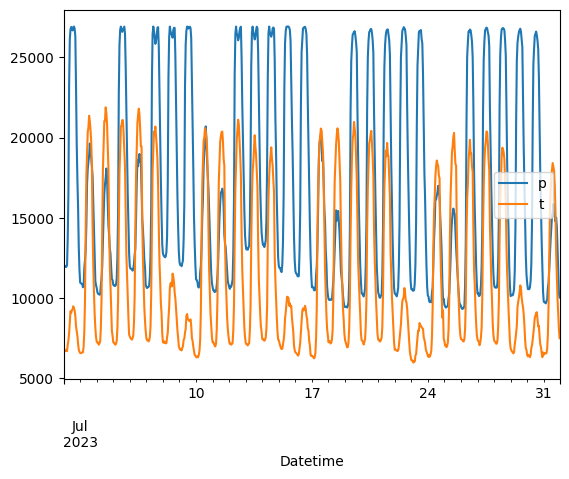

In [82]:
import matplotlib.pyplot as plt

pred = scaler.inverse_transform(pred)

pred = pd.DataFrame(pred)
pred.index = test.index
a=pd.DataFrame()
a['p'] = pred
a['t'] = test

a.plot()